In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
theoretical = np.fromfile('initial_pk_linear_theo.data', dtype=np.double)
initial = np.fromfile('initialAverageSpectrum.data', dtype=np.double)
final = np.fromfile('finalAverageSpectrum.data', dtype=np.double)

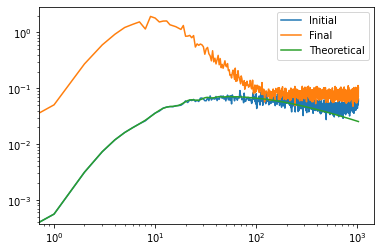

In [3]:
initial[0] = 0.0
final[0] = 0.0
plt.figure()
plt.title('Power Spectrum')
plt.loglog(initial, label='Initial')
plt.loglog(final, label='Final')
plt.loglog(theoretical, label='Theoretical')
plt.legend()
plt.savefig('single.png')
plt.show()

In [4]:
error = np.fromfile('errorSpectrum.data', dtype=np.double)
average = np.fromfile('averageSpectrum.data', dtype=np.double)
x = np.arange(1025)
average[0] = 0.
error[0] = 0.
plt.figure()
plt.errorbar(x, average, yerr=error, label='Average')
plt.plot(x, theoretical, label='Theoretical')
plt.legend()
plt.savefig('errorbars.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'errorSpectrum.data'

In the previous graph it can be seen that the power spectrum for high frequencies increases, reaching a value around twice the theoretical one. This is due to the aliasing effect with the next image of the spectrum